# Question_2: Plot the average delay time per provider (EUROSTAR, NMBS, THALYS).



In [57]:
import src.data_processing.data as data
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
trips = data.full_trips

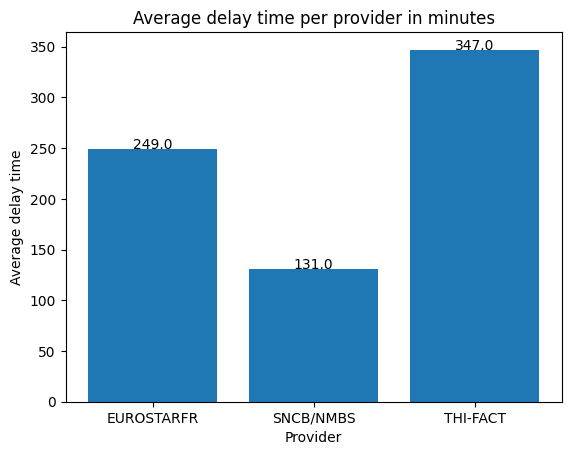

<Figure size 1000x1000 with 0 Axes>

In [45]:
trips = data.full_trips
def addvaluelabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

delay_provider = trips.groupby("Railway operators")["Delay time"].mean().reset_index().round()
plt.bar(delay_provider["Railway operators"], delay_provider["Delay time"])

addvaluelabels(delay_provider["Railway operators"], delay_provider["Delay time"])

plt.title("Average delay time per provider in minutes")
plt.xticks(rotation=0)
plt.xlabel("Provider")
plt.ylabel("Average delay time")
plt.figure(figsize=(10,10))
plt.show()
